In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'

**Кластеризация k-means**

k-means - один из алгоритмов вероятностного подхода

Метод К-средних — это алгоритм машинного обучения без учителя. Это значит, что он принимает непомеченные данные и пытается сгруппировать кластеры подобных наблюдений ваших данных. Метод К-средних крайне полезен для решения реальных прикладных задач. Вот примеры нескольких задач, подходящих для этой модели:

* Сегментация клиентов для маркетинговых групп
* Классификация документов
* Оптимизация маршрутов доставки для таких компаний, как Amazon, UPS или FedEx
* Выявление и реагирование на криминальные локации в городе
* Профессиональная спортивная аналитика
* Прогнозирование и предотвращение киберпреступлений

Главная цель метода К-средних — разделить множество данных на различимые группы таким образом, чтобы элементы внутри каждой группы были схожи между собой.

Вот визуальное представление того, как это выглядит на практике:

![Компьютер](png_1.png)

Как работает метод К-средних?

Первый шаг в работе метода К-средних — это выбор количества групп на которое вы хотите разделить ваши данные. Этим количеством и является значение К, отраженное в названии алгоритма. Выбор значения К в методе К-средних очень важен. Чуть позже мы обсудим как выбрать правильное значение К.

Далее, вы должны случайным образом выбрать точку в наборе данных и причислить ее к случайному кластеру. Это даст вам начальное положение данных, на котором вы прогоняете следующую итерацию до тех пор, пока кластеры перестанут изменяться:

* Вычисление центроида (центр тяжести) каждого кластера взяв средний вектор точек в этом кластере
* Переотнести каждую точку данных к кластеру, центроид которого ближе всего к точке

Выбор подходящего значения К в методе К-средних

Строго говоря, выбор подходящего значения К — это довольно сложно. Не существует «правильного» ответа в выборе «лучшего» значения К. Один из методов, который специалисты по МО часто используют, называется «методом локтя».

Для использования этого метода, первое, что вам необходимо сделать, это вычислить сумму квадратов отклонений(sum of squared errors) — СКО для вашего алгоритма для группы значений К. СКО в методе К-средних определена как сумма квадратов расстояний между каждой точкой данных в кластере и центром тяжести этого кластера.

В качестве примера этого шага, вы можете вычислить СКО для значений К 2, 4, 6, 8 и 10. Далее вы захотите сгенерировать график СКО и этих значений К. Вы увидите, что отклонение уменьшается с увеличением значения К.

И это имеет смысл: чем больше категорий вы создадите на основе множества данных — тем более вероятно, что каждая точка данных окажется близко к центру кластера этой точки.
С учетом сказанного, основная идея метода локтя — это выбрать значение К при котором СКО резко замедлит темпы снижения. Это резкое снижение образует «локоть» на графике.

Как пример, вот график СКО относительно К. В этом случае, метод локтя предложит использовать значение К примерно равное 6.

![Компьютер](png_2.png)

Важно, что К=6 просто оценка приемлемого значения К. Не существует «лучшего» значения К в методе К-средних. Как и многие вещи в области МО, это очень зависящее от ситуации решение.


In [209]:
from sklearn.cluster import KMeans

In [210]:
model = KMeans(n_clusters=3, random_state=100)

![Компьютер](km_1.png)

*Зеленые точки - объекты, красные ромбы - центры кластеров (центроиды)

---

На начальной итерации центроиды выбираются случайным образом:

![Компьютер](km_2.png)

После того, как центроиды подобраны:

![Компьютер](km_1.png)

---

Функция для создания учебного датасета

(признаки рыб, обитающих в озере)

In [211]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([20, 0.5])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [212]:
train = make_data(10, 42)
test = make_data(10, 27)

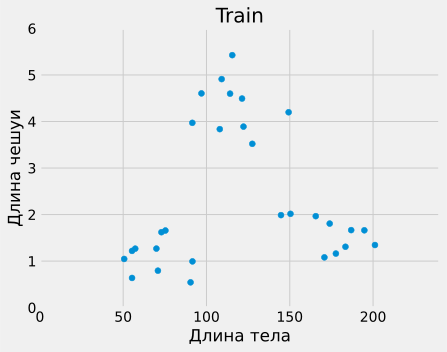

In [213]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')
plt.show()

Нормализация данных

In [214]:
from sklearn.preprocessing import MinMaxScaler

In [215]:
scaler = MinMaxScaler()

In [216]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=['x', 'y'])

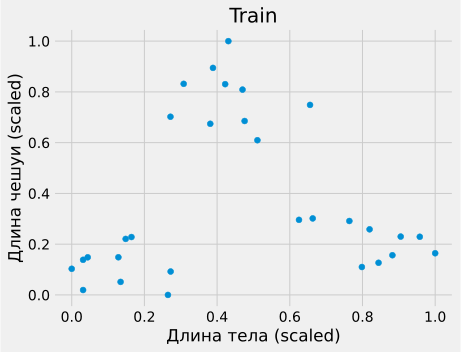

In [217]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('Длина тела (scaled)')
plt.ylabel('Длина чешуи (scaled)')
plt.title('Train')
plt.show()

Построение модели кластеризации

In [218]:
train_labels = model.fit_predict(train_scaled)

In [219]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1], dtype=int32)

**Центры кластеров**

In [220]:
model.cluster_centers_

array([[0.82595794, 0.21634417],
       [0.12190576, 0.11495728],
       [0.4314873 , 0.77857028]])

In [221]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[174.94355655,   1.59972071],
       [ 68.96122223,   1.10467088],
       [115.56312871,   4.34494667]])

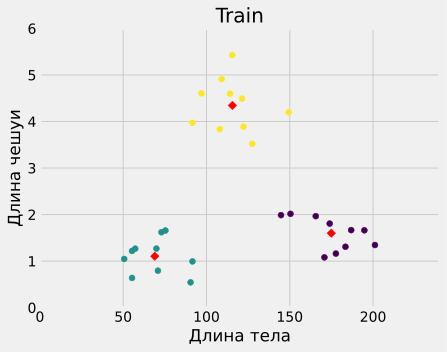

In [222]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', c='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')
plt.show()

**Inertia**

Величина, показывающая, насколько далеко в среднем расположены точки от центров своих кластеров

(сумма квадратов расстояний от объектов до центров их кластеров).

Чем она меньше, тем лучше разбиение на кластеры, но нужно соблюдать баланс между ее значением и количеством кластеров.

Равна нулю, если кластеров столько же, сколько и объектов.

In [223]:
model.inertia_

0.5417377477488047

In [224]:
inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

3.2228524759590016
0.5417377477488047
0.4281736891174851
0.3685868866697205
0.3375834496851389
0.3131823000143884
0.17724766852479432
0.14985583831683894


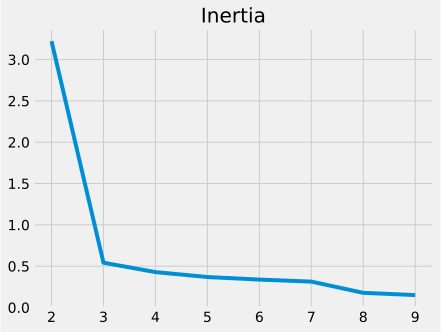

In [225]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('Inertia')
plt.show()

Метод локтя - берем число кластеров = 3

**Отнесение примеров из тестового датасета к определенному кластеру**

In [226]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [227]:
test_labels = model.predict(test_scaled)

In [228]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0], dtype=int32)

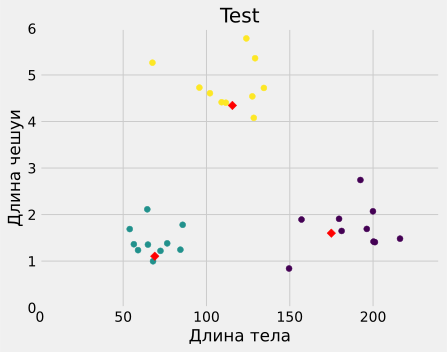

In [229]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', c='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')
plt.show()

**AgglomerativeClustering**

**Агломеративные** алгоритмы - алгоритмы иерархического подхода, основанные на объединении мелких кластеров в более крупные.

Вначале каждый объект считается отдельным кластером.

Другие алгоритмы иерархического подхода - **дивизивные** - используют обратный порядок, когда сначала вся выборка считается одним кластером, и затем этот кластер делится на более мелкие.

In [230]:
from sklearn.cluster import AgglomerativeClustering

In [231]:
model = AgglomerativeClustering(n_clusters=3)

In [232]:
train_labels = model.fit_predict(train_scaled)

In [233]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1])

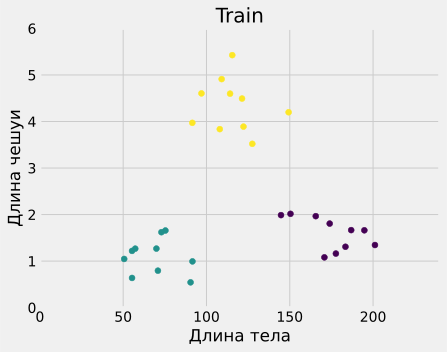

In [234]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')
plt.show()

В методе AgglomerativeClustering нет метода predict, используем KNN

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
knn = KNeighborsClassifier(n_neighbors=5)

In [237]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier()

In [238]:
test_labels = knn.predict(test_scaled)

In [239]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0])

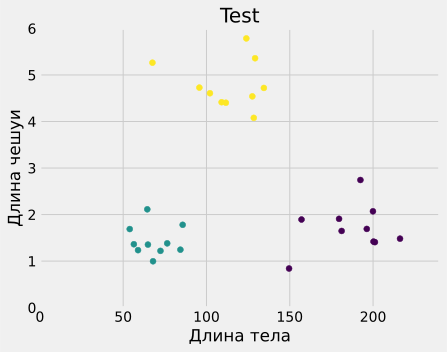

In [241]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')
plt.show()